<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko) and Vadim Shestopalov (@vchulski). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

## <center>Разведывательный анализ данных в Pandas (история олимпийских игр)
    
Данные содержат следующие признаки:

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/olympics/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


*Hint:* возможно, в некоторых случаях нужно избавиться от дубликатов, чтобы учитывать одного атлета только один раз. Ниже пример как это сделать. Например, удалим все дубликаты атлетов.


In [4]:
display(data.shape[0])
display(data.drop_duplicates('Name').shape[0])

271116

134732

Можно удалять полные дубликаты, а можно дубликаты по нескольким колонкам (например, удалять не все дубликаты атлетов, а оставлять одно упоминание атлета для каждых игр)

In [5]:
display(data.shape[0]) # всего атлетов

# всего атлетов, если не учитывать записи с одинаковым именем для одинаковых игр
display(data.drop_duplicates(['Name', 'Games']).shape[0]) 

# всего атлетов, если не учитывать дубликаты по имени, росту и возрасту
display(data.drop_duplicates(['Name', 'Age', 'Height']).shape[0]) 

271116

187297

187059

Обратите внимание, что данный метод не перезаписывает данные, поэтому, чтобы сохранить измененный датафрейм, нужно записать его в переменную.

**1. Сколько лет было самым молодым участникам (мужчина и женщина) олимпийских игр в 1992 году?**


In [6]:
maleMinAge = data[data['Sex'] == 'M']['Age'].min()
femaleMinAge = data[data['Sex'] == 'F']['Age'].min()

print('M min age is ', maleMinAge)

print('F min age is ', femaleMinAge)

M min age is  10.0
F min age is  11.0


__2. Какую пропорцию составляют мужчины-баскетболисты среди всех участников игр 2012 года. Округлите ответ до двух знаков.__



In [7]:
float( ((data['Sport'] == 'Basketball') & (data['Sex'] == 'M')).sum()) / data.shape[0]

0.01209814249251243

__3. Найдите среднее и стандартное отклонение для роста теннисисток (большой теннис), которые участвовали в играх 2000 года. Округлите ответ до второго знака.__


In [8]:
fTennis = data[(data['Sport'] == 'Tennis') & (data['Sex'] == 'F') & (data['Year'] == 2000)]['Height']
print(
    " Среднее - ", round(fTennis.mean()) ,'\n',
    "Стд отклонение - ", round(fTennis.std(), 1)
)

 Среднее -  172 
 Стд отклонение -  6.5


__4. Выведите названия всех уникальных дисциплин, связанных с катанием на коньках (Skating). Посчитайте их количество__ 

In [9]:
skating = data[data['Sport'].str.contains(r'Skating')]
skating.drop_duplicates(['Sport'])['Sport']

4                   Speed Skating
265                Figure Skating
2848    Short Track Speed Skating
Name: Sport, dtype: object

__5. Найдите самую легкую атлетку игр 2006 года. В каком виде спорта она участвовала?__


In [10]:
lightest = data[['Sport', 'Weight']][(data['Year'] == 2006) & (data['Sex'] == 'F')]
lightest = lightest[lightest['Weight'] == lightest['Weight'].min()]
lightest


,Sport,Weight
188177,Figure Skating,38.0


__6. В скольких олимпиадах принимал участие John Aalberg?__

In [11]:

john = data.drop_duplicates(['Name', 'Games'])[data['Name'] == 'John Aalberg']
print (john.shape[0])

2


C:\Users\alexd\AppData\Local\Temp\ipykernel_6860\2359985071.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  john = data.drop_duplicates(['Name', 'Games'])[data['Name'] == 'John Aalberg']


__7. Сколько золотых медалей настольном теннисе выиграл Китай на Олимпиаде в 2008 году?__

In [12]:
china = data[(data['Sport'] == 'Table Tennis') & (data['Team'] == 'China') & (data['Medal'] == 'Gold') & (data['Year'] == 2008)].shape[0]
china

8

__8. Правда ли, что Испания выиграла меньше медалей чем Италия на играх 2016 года? Ну учитывайте NaN в колонке _Medal_.__


In [13]:
dt = data[((data['Team'] == 'Spain') | (data['Team'] == 'Italy')) & (data['Year'] == 2016)]
dt = dt.dropna(subset = ['Medal'])
spain = dt[dt['Team'] == 'Spain'].shape[0]
italy = dt[dt['Team'] == 'Italy'].shape[0]

print(spain > italy)

False


__9. Найдите самую многочисленную и самую малочисленную группу по возрасту среди всех участников игр (разбейте возраст по 10 лет).__


In [14]:
maxGroup = 0
minGroup = 10000000


for i in range (9):
    temp = data[(data['Age'] >= i*10) & (data['Age'] <= (i+1)*10)].shape[0]
    print(temp)
    if temp > maxGroup:
        maxGroup = temp
        maxId = i
    if temp < minGroup:
        minGroup = temp
        minId = i
print(
    'Самая многочисленная -', maxId*10, '-', (maxId+1)*10, '\n',
    'Самая малочисленная -', minId*10, '-', (minId+1)*10, 
)


1
47561
187232
43894
6973
1646
557
121
9
Самая многочисленная - 20 - 30 
 Самая малочисленная - 0 - 10


__10. Проводились ли летние олимпийские игры в Atlanta? А зимние в Squaw Valley? Верните True или False__

In [15]:
display((data['City'] == 'Atlanta').any())
display(((data['City'] == 'Squaw Valley') & data['Games'].str.contains(r'Winter')).any())

True

True

__11. Найдите абсолютную разницу между количеством уникальных видов спорта на играх в 1988 году и в 2002__

In [16]:
sp1988 = data[data['Year'] == 1988]
sp2002 = data[data['Year'] == 2002]

print(abs(sp1988.drop_duplicates(subset = ['Sport']).shape[0] - sp2002.drop_duplicates(subset = ['Sport']).shape[0]))

22


__12. Найдите, в каких годах проводились соревнования по керлингу__ (по керлингу чето не ищет посмотрю Speed Skating)

In [17]:
speedSk = data[data['Sport'] == 'Speed Skating']
display(speedSk.drop_duplicates(subset = 'Year')['Year'])


4        1988
6        1992
8        1994
83       1960
85       1964
110      1952
111      1956
972      2006
975      2010
999      1998
1001     2002
4130     1980
5132     1948
6745     1976
6956     2014
6991     1928
7560     1936
8358     1968
9868     1972
12363    1984
13462    1932
21285    1924
Name: Year, dtype: int64

__13. Постройте распределение возраста керлингистов (мужчик), участвовавших в олимпиаде в Sochi__ 

<AxesSubplot:>

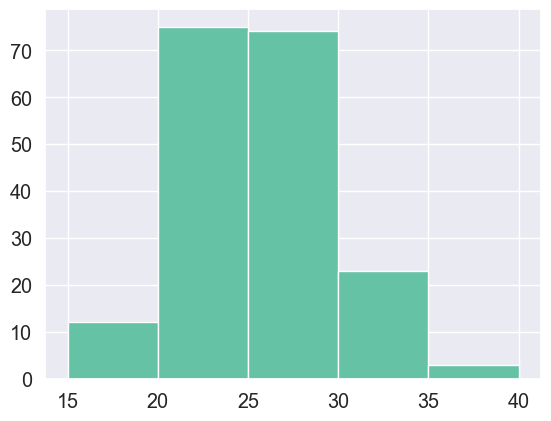

In [18]:
speedSk = speedSk[(speedSk['City'] == 'Sochi') & (speedSk['Sex'] == 'M')]
speedSk['Age'].hist(bins= [15, 20, 25, 30, 35, 40])


__14. Выведите бар-чарт для медалей (золотые, серебряные и бронзовые) для Australia за всю историю зимних олипиад__ 

In [53]:
australia = data[(data['Team'] == 'Australia') & data['Games'].str.contains(r'Winter')]
australia = australia.dropna(subset = ['Medal'])
# australia['Count'][australia['Medal'] == 'Bronze'] = australia[australia['Medal'] == 'Bronze'].shape[0]
# australia['Count'][australia['Medal'] == 'Silver'] = australia[australia['Medal'] == 'Silver'].shape[0]
# australia['Count'][australia['Medal'] == 'Gold'] = australia[australia['Medal'] == 'Gold'].shape[0]
australia.groupby('Medal').count()
australia


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
17582,9371,Dale Begg-Smith,M,21.0,186.0,84.0,Australia,AUS,2006 Winter,2006,Winter,Torino,Freestyle Skiing,Freestyle Skiing Men's Moguls,Gold
17583,9371,Dale Begg-Smith,M,25.0,186.0,84.0,Australia,AUS,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Men's Moguls,Silver
27971,14492,Steven John Bradbury,M,20.0,178.0,80.0,Australia,AUS,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
27976,14492,Steven John Bradbury,M,28.0,178.0,80.0,Australia,AUS,2002 Winter,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",Gold
29209,15096,Torah Jane Bright (-Thomson),F,23.0,161.0,57.0,Australia,AUS,2010 Winter,2010,Winter,Vancouver,Snowboarding,Snowboarding Women's Halfpipe,Gold
29211,15096,Torah Jane Bright (-Thomson),F,27.0,161.0,57.0,Australia,AUS,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Women's Halfpipe,Silver
34483,17774,Alisa Peta Camplin (-Warner),F,27.0,157.0,49.0,Australia,AUS,2002 Winter,2002,Winter,Salt Lake City,Freestyle Skiing,Freestyle Skiing Women's Aerials,Gold
34484,17774,Alisa Peta Camplin (-Warner),F,31.0,157.0,49.0,Australia,AUS,2006 Winter,2006,Winter,Torino,Freestyle Skiing,Freestyle Skiing Women's Aerials,Bronze
69438,35388,George Ingle Finch,M,35.0,NaN,NaN,Australia,AUS,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
90306,45766,Kieran Hansen,M,22.0,176.0,78.0,Australia,AUS,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze


__15. Выведете всех уникальных спортсменов с фамилией Belov и посчитайте их количество. Заодно обратите внимание, как обозначен в данных СССР.__

__16. Постройте тренд общего количества медалей по годам на летних играх за всю историю участия СССР.__

Так как в командных видах спорта медали получают все члены команды, нужно удалить дубликаты соревнования, в котором получена медаль. Так соревнования могут повторяться, если представители страны выиграли медали разного достоинста, то эту операцию нужно проделать отдельно для всех типов медалей, а затем просуммировать.

__17. Какая страна завоевала больше всех медалей в Figure Skating за всю историю.__

__18. Выведите количество уникальных дисциплин, которые проводятся только среди мужчин, среди женщин и смешанные дисциплины (Mixed).__

__19. Выведете средний вес атлетов и атлеток, участвующих в соревнованиях по гимнастике (Gymnastics), но не учитывая художественную гимнастику (Rhythmic Gymnastics). Не учитывайте одних и тех же атлетов два раза.__

__20. Проверьте, выиграла ли принимающая страна больше всего медалей, когда олимпиада проводилась в Москве. Выведите True или False__